In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
df=pd.read_csv("Dentistry Dataset.csv")




In [5]:
# describing dataset 
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [2]:
# handling dataset for missing value 
df1=df
df1.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [9]:

# Display the count of missing values
df1.isnull().sum()
df1.drop("Sample ID",axis=1)


,Sl No,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [10]:
# Encoding Categorical data

from sklearn.preprocessing import LabelEncoder

# Creating a copy of the original dataframe
df_label = df1.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to Gender column
df_label['Gender'] = le.fit_transform(df_label['Gender'])

print(df_label.head())

# Print unique values and their encoding
print("\
Gender Encoding Map:")
print("Original values:", le.classes_)
print("Encoded values:", le.transform(le.classes_))

   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24       0                            25.06   
1      2        NaN   22       0                            25.78   
2      3        NaN   23       0                            23.83   
3      4        NaN   20       0                            26.12   
4      5        NaN   20       0                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.9

In [12]:
# Split independent and dependent variables i.e. X and Y

# Defining Features (X) and target (Y)
# Excluding 'Sl No' as an index
X = df_label[['Age', 'Gender', 'inter canine distance intraoral', 'intercanine distance casts', 
              'right canine width intraoral', 'right canine width casts', 
              'left canine width intraoral', 'left canine width casts']]

Y = df_label[['right canine index intra oral', 'right canine index casts', 
              'left canine index intraoral', 'left canine index casts']]

print("Features (X) shape:", X.shape)
print("Target (Y) shape:", Y.shape)

print("\
Features (X) head:")
print(X.head())
print("\
Target (Y) head:")
print(Y.head())

Features (X) shape: (1100, 8)
Target (Y) shape: (1100, 4)
Features (X) head:
   Age  Gender  inter canine distance intraoral  intercanine distance casts  \
0   24       0                            25.06                       25.05   
1   22       0                            25.78                       25.79   
2   23       0                            23.83                       23.83   
3   20       0                            26.12                       26.12   
4   20       0                            26.36                       26.41   

   right canine width intraoral  right canine width casts  \
0                          6.08                      6.08   
1                          6.13                      6.13   
2                          5.91                      5.96   
3                          6.08                      6.08   
4                          6.09                      6.09   

   left canine width intraoral  left canine width casts  
0                      

In [15]:
# Normalize the X variable from sklearn.preprocessing import Normalizer  #all the values will fall in the range [0,1] or sometimes[ -1 , +1]

from sklearn.preprocessing import Normalizer

# Initializing the Normalizer
normalizer = Normalizer()

# Normalizing the features of (X)
X_normalized = normalizer.fit_transform(X)

# Converting to DataFrame to maintaing column names
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

print("First few rows of normalized features:")
print(X_normalized.head())

# Verifing the normalization
row_norms = np.sqrt((X_normalized ** 2).sum(axis=1))
print("\
Verifying row norms (should be close to 1):")
print(row_norms.head())



First few rows of normalized features:
        Age  Gender  inter canine distance intraoral  \
0  0.539396     0.0                         0.563219   
1  0.495789     0.0                         0.580975   
2  0.540010     0.0                         0.559497   
3  0.455900     0.0                         0.595406   
4  0.452793     0.0                         0.596781   

   intercanine distance casts  right canine width intraoral  \
0                    0.562994                      0.136647   
1                    0.581200                      0.138145   
2                    0.559497                      0.138759   
3                    0.595406                      0.138594   
4                    0.597913                      0.137876   

   right canine width casts  left canine width intraoral  \
0                  0.136647                     0.136872   
1                  0.138145                     0.142652   
2                  0.139933                     0.147446   
3    

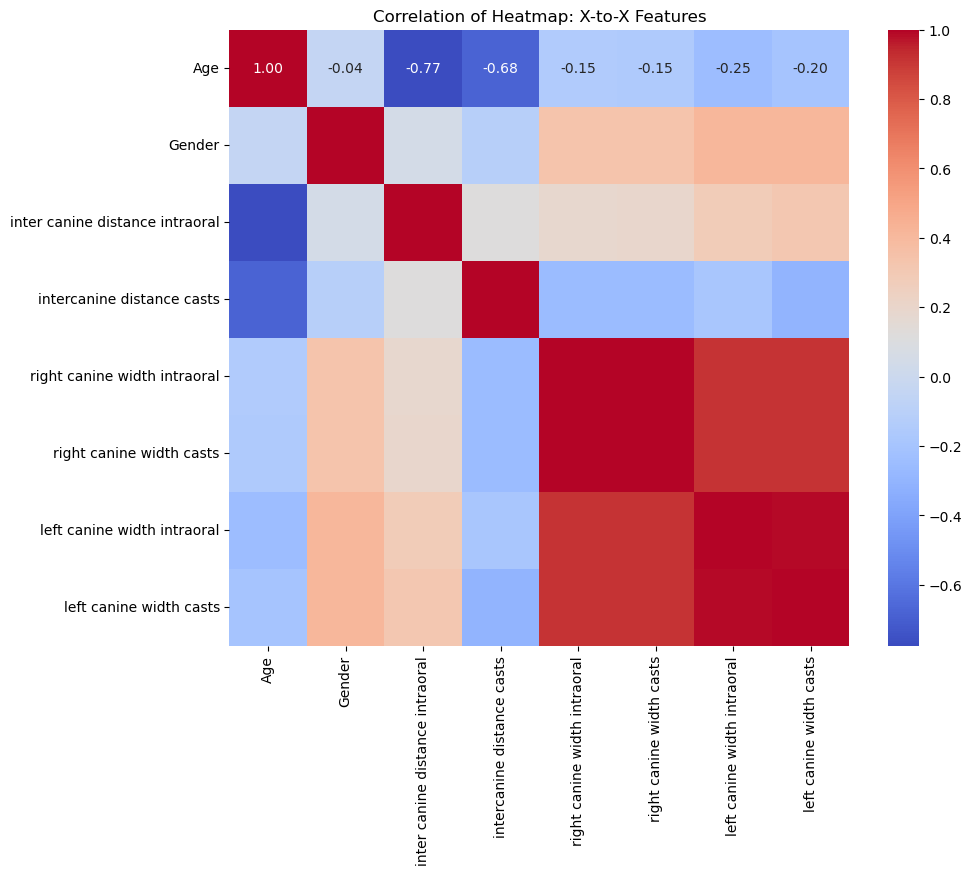

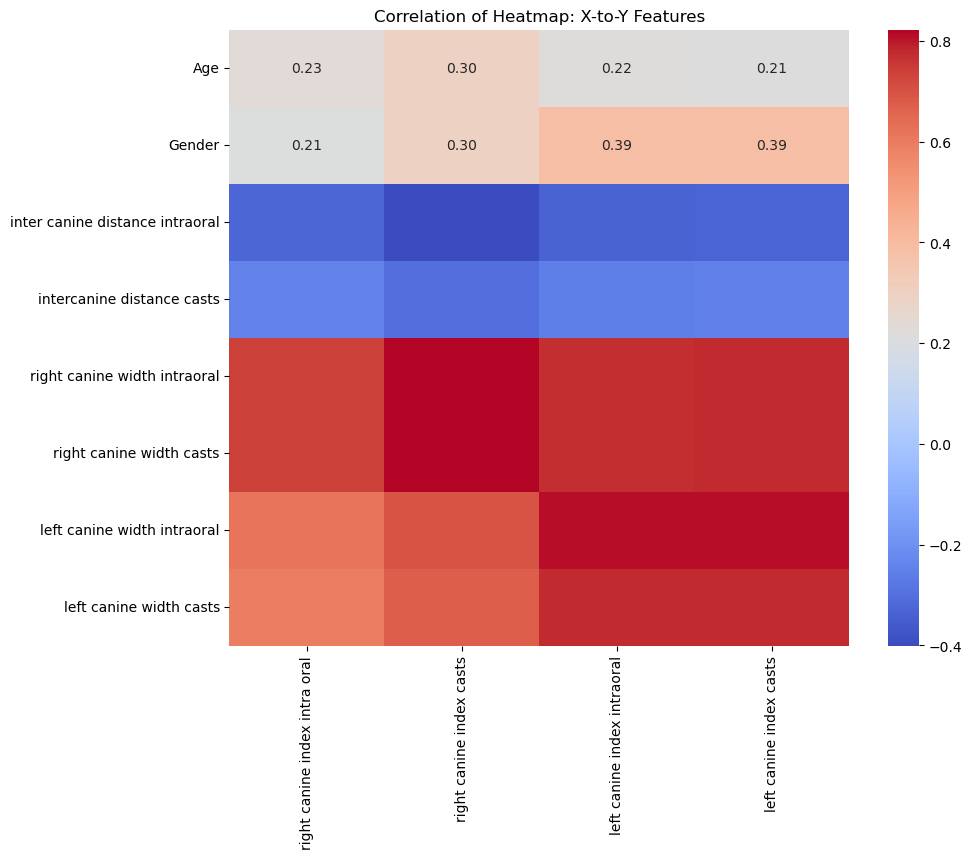

In [16]:
# Step 5 . Exploratory Data Analysis
# i)."You need to check the correlation of the data using Heatmap between X-to-X features and 
# X-to-Y features to understand the relationship and collinearity issues between the features."

# Calculating correlation matrices
corr_matrix_x = X_normalized.corr()
corr_matrix_xy = pd.concat([X_normalized, Y], axis=1).corr().loc[X_normalized.columns, Y.columns]

# Ploting heatmap for X-to-X features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_x, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Heatmap: X-to-X Features')
plt.show()

# Ploting heatmap for X-to-Y features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_xy, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Heatmap: X-to-Y Features')
plt.show()

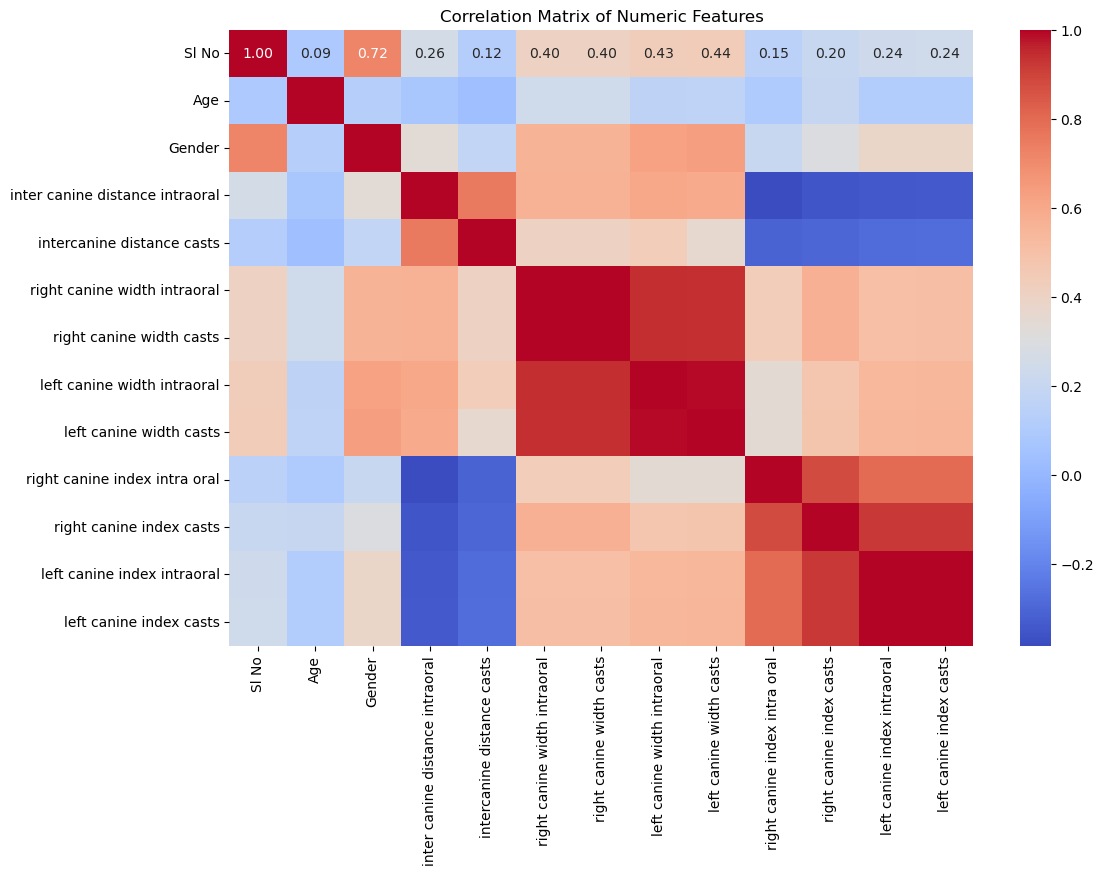

In [33]:
# Calculate the correlation matrix for numeric columns only
numeric_df = df_label.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [18]:
# 6. Model Building 

# i. Drop the unwanted independent variables which you see not important for model building.

from sklearn.preprocessing import Normalizer


# Define features (X)
X = df1[['Age', 'Gender', 'inter canine distance intraoral', 'intercanine distance casts', 
        'right canine width intraoral', 'right canine width casts', 
        'left canine width intraoral', 'left canine width casts']]

# Convert Gender to numeric
X['Gender'] = (X['Gender'] == 'Male').astype(int)

# Normalize
normalizer = Normalizer()
X_normalized = pd.DataFrame(normalizer.fit_transform(X), columns=X.columns)

# Drop highly correlated features
X_reduced = X_normalized.drop(['intercanine distance casts', 'right canine width casts', 'left canine width casts'], axis=1)

print("Remaining features:")
print(X_reduced.columns.tolist())
print("\
Shape of reduced feature set:", X_reduced.shape)
print("\
First few rows of reduced dataset:")
print(X_reduced.head())

Remaining features:
['Age', 'Gender', 'inter canine distance intraoral', 'right canine width intraoral', 'left canine width intraoral']
Shape of reduced feature set: (1100, 5)
First few rows of reduced dataset:
        Age  Gender  inter canine distance intraoral  \
0  0.539396     0.0                         0.563219   
1  0.495789     0.0                         0.580975   
2  0.540010     0.0                         0.559497   
3  0.455900     0.0                         0.595406   
4  0.452793     0.0                         0.596781   

   right canine width intraoral  left canine width intraoral  
0                      0.136647                     0.136872  
1                      0.138145                     0.142652  
2                      0.138759                     0.147446  
3                      0.138594                     0.149535  
4                      0.137876                     0.147158  


C:\Users\Victory\AppData\Local\Temp\ipykernel_7000\1360311078.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = (X['Gender'] == 'Male').astype(int)


In [19]:
# ii.) Drop the independent features which are highly correlated to each other 


# Calculate correlation matrix for remaining features
correlation_matrix = X_reduced.corr()

# Find highly correlated pairs (threshold > 0.7)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i,j]) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j]))

print("Highly correlated pairs (>0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Drop one feature from each highly correlated pair
features_to_drop = ['left canine width intraoral']  # Based on correlation with right canine width
X_final = X_reduced.drop(features_to_drop, axis=1)

print("\
Final features after removing highly correlated variables:")
print(X_final.columns.tolist())
print("\
Final shape:", X_final.shape)
print("\
First few rows of final dataset:")
print(X_final.head())


Highly correlated pairs (>0.7):
Age - inter canine distance intraoral: -0.775
right canine width intraoral - left canine width intraoral: 0.914
Final features after removing highly correlated variables:
['Age', 'Gender', 'inter canine distance intraoral', 'right canine width intraoral']
Final shape: (1100, 4)
First few rows of final dataset:
        Age  Gender  inter canine distance intraoral  \
0  0.539396     0.0                         0.563219   
1  0.495789     0.0                         0.580975   
2  0.540010     0.0                         0.559497   
3  0.455900     0.0                         0.595406   
4  0.452793     0.0                         0.596781   

   right canine width intraoral  
0                      0.136647  
1                      0.138145  
2                      0.138759  
3                      0.138594  
4                      0.137876  


In [21]:
# iii.)  Split the Data into Train and Test set from sklearn.preprocessing import train_test_split


from sklearn.model_selection import train_test_split

# Assuming Y is the target variable, which needs to be defined or loaded
# For demonstration, let's assume Y is a placeholder for the actual target variable
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)





Training set shape: (880, 4) (880,)
Testing set shape: (220, 4) (220,)


In [23]:
print("Available columns in the dataset:")
print(df.columns.tolist())

Available columns in the dataset:
['Sl No', 'Sample ID', 'Age', 'Gender', 'inter canine distance intraoral', 'intercanine distance casts', 'right canine width intraoral', 'right canine width casts', 'left canine width intraoral', 'left canine width casts', 'right canine index intra oral', 'right canine index casts', 'left canine index intraoral', 'left canine index casts']


In [24]:
Y = (df['Gender'] == 'Male').astype(int)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\
Class distribution in training set:")
print(Y_train.value_counts(normalize=True))

Training set shape: (880, 4)
Testing set shape: (220, 4)
Class distribution in training set:
Gender
1    0.503409
0    0.496591
Name: proportion, dtype: float64


In [2]:
#iv) Use Logistic Regression, Decision Tree classifier, Random Forest classifier and XGBoost classifier.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reading and preparing a data
X = df1[['inter canine distance intraoral', 'right canine width intraoral', 'left canine width intraoral', 'right canine index intra oral']]
y = (df1['Gender'] == 'Male').astype(int)

# Initializing models
log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train and evaluate model
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dec_tree,
    'Random Forest': rand_forest,
    'XGBoost': xgb_clf
}

results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'report': report}
    print(f"\
{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)


ModuleNotFoundError: No module named 'xgboost'

In [3]:
# step 7 : Evaluation 
# You need to evaluate the model based on the models evaluation metrics i.e. Confusion matrix(Accuracy),
# ROC curve and AUC curve to check model accuracy and plot them

from sklearn.metrics import confusion_matrix, roc_curve, auc

# Functioning to a plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Functionng to a plot ROC curve
def plot_roc_curve(y_true, y_score, title):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Evaluating into each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]
    
    # Ploting confusion matrix
    plot_confusion_matrix(Y_test, y_pred, f'{name} Confusion Matrix')
    
    # Ploting ROC curve
    plot_roc_curve(Y_test, y_score, f'{name} ROC Curve')
    
    print(f"{name} evaluation completed.")


NameError: name 'models' is not defined